In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy.interpolate import griddata
# import LossAccPlotter
# from laplotter import LossAccPlotter
# from check_laplotter import show_chart, add_noise

if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)



pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


cuda:0


In [2]:
global temp_list
temp_list = []
Agent_number_n=5;
Alpha = 1.0;

echo = 2001
BATCH_SIZE = 64
LR = 0.001           # learning rate for generator

def Generate_distribution(Agent_number_n):
    return sorted(np.random.rand(Agent_number_n), reverse=True)
    #return sorted(np.random.normal(normalloc,normalscale,Agent_number_n), reverse=True)


In [3]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function_label(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h

def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    h_list = []
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
        
        h = h_function_label(temp)
        h_list.append(float(h))
    temp_list = np.array(temp_list)
    x_list = np.array(x_list)
    return temp_list,S,x_list,h_list
    

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    temp_list = np.array(temp_list)
    return temp_list,S
    

def read_testing_data():
    for i in range(10000):
        appen_test(Generate_distribution(Agent_number_n));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(testing_data)
print(testing_label)

[[[0.57401468 0.47904803 0.25789763 0.04228511]
  [0.6825702  0.47904803 0.25789763 0.04228511]
  [0.6825702  0.57401468 0.25789763 0.04228511]
  [0.6825702  0.57401468 0.47904803 0.04228511]
  [0.6825702  0.57401468 0.47904803 0.25789763]]

 [[0.5063007  0.27844529 0.23895324 0.18982784]
  [0.70978843 0.27844529 0.23895324 0.18982784]
  [0.70978843 0.5063007  0.23895324 0.18982784]
  [0.70978843 0.5063007  0.27844529 0.18982784]
  [0.70978843 0.5063007  0.27844529 0.23895324]]

 [[0.62164328 0.61416742 0.34020401 0.20581105]
  [0.75952404 0.61416742 0.34020401 0.20581105]
  [0.75952404 0.62164328 0.34020401 0.20581105]
  [0.75952404 0.62164328 0.61416742 0.20581105]
  [0.75952404 0.62164328 0.61416742 0.34020401]]

 ...

 [[0.43746395 0.40507724 0.13233254 0.06378896]
  [0.92458527 0.40507724 0.13233254 0.06378896]
  [0.92458527 0.43746395 0.13233254 0.06378896]
  [0.92458527 0.43746395 0.40507724 0.06378896]
  [0.92458527 0.43746395 0.40507724 0.13233254]]

 [[0.280003   0.09950201 0

In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(testing_data[index][i][0])
        y_list.append(testing_data[index][i][1])
        h = h_function(testing_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    result_list.append(sum(h_list)/testing_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list),sum(result_list)/len(result_list))

4.351752551702378 3.999999999999999 0.3517525517023792 4.06884935716782


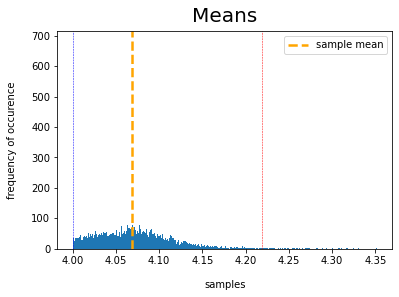

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.normal_(m.bias, mean=0.0, std=0.01)


class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()

        self.input_dim = (Agent_number_n-1)
        self.hidden_dim = 100
        self.output_dim = 1
        self.hidden_layer_count = 6

        current_dim = self.input_dim
        self.layers = torch.nn.ModuleList()
        for i in range(self.hidden_layer_count):
            self.layers.append(torch.nn.Linear(current_dim, self.hidden_dim))
            current_dim = self.hidden_dim
        self.layers.append(torch.nn.Linear(current_dim, self.output_dim))

    def calculate(self, value_list):
        h = value_list
        for layer in self.layers:
            h = torch.relu(layer(h))
        return h

    def forward(self, input_list, input_label, label):
        global iteration, echo, target_order
        loss1 = 0
        loss2 = 0
        input_list = torch.from_numpy(
            np.array(input_list)).to(dev).type(torch.float32)
        h_list = []

        for i in range(Agent_number_n):
            h = self.calculate(input_list[i])
            h_list.append(h)
#             loss3 += torch.square(h_function_2(input_list)-h2[1])

        input_label = torch.from_numpy(
            np.array(input_label)).to(dev).type(torch.float32)
        sum_h = torch.sum(torch.cat(h_list)).to(dev)

        loss1 = torch.where((Agent_number_n-1)*input_label > sum_h,
                            torch.square(
                                ((Agent_number_n-1)*input_label-sum_h)),
                            torch.zeros(1).to(dev)
                            )
#         loss2 = torch.relu((sum_h-(Agent_number_n-Alpha)*input_label))/10000

        loss2 = torch.where((Agent_number_n-Alpha)*input_label<sum_h,
                        torch.square((sum_h-(Agent_number_n-Alpha)*input_label))/10000,
                        torch.zeros(1).to(dev)
                      )

#         loss1 = torch.relu(((Agent_number_n-1)*input_label-sum_h))

#         loss2 = torch.relu((sum_h-(Agent_number_n-Alpha)*input_label))/10000

        return loss1, loss2
    def supervised_loss(self, input_list,label):
        global iteration,echo,target_order
        input_list = torch.from_numpy(
            np.array(input_list)).to(dev).type(torch.float32)
        loss = 0 
        for i in range(Agent_number_n):
            h = self.calculate(input_list[i])
            loss += torch.square(h - label[i])
        return loss

In [7]:
random.seed(2000)
torch.manual_seed(256)
net  = Net()
net.apply(weight_init)

#net = torch.load("save/Deep_learning_uniform_5_1")
net.to(dev)
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00005)
optimizer = opt.Adam(net.parameters(), lr=LR)
#optimizer = opt.Adadelta(net.parameters(), lr=1.0)
print(net)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.95)


index_train_list = []
index_test_list = []
train_losses = []
test_losses = []

Net(
  (layers): ModuleList(
    (0): Linear(in_features=4, out_features=100, bias=True)
    (1): Linear(in_features=100, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Linear(in_features=100, out_features=100, bias=True)
    (6): Linear(in_features=100, out_features=1, bias=True)
  )
)


In [8]:
#supervised
index_supervisedtrain_list = []
supervisedtrain_losses = []
for iteration in range(1000):

    temp_number = 0
    total_batch_loss = 0 
    
    loss_sum = 0
    denominator = 0
    for index in range(0, BATCH_SIZE):
        training_data_i, training_S, training_data,label = appen_train(
            Generate_distribution(Agent_number_n))
        h_loss = net.supervised_loss(training_data_i, label)
        denominator += 1
        loss_sum += h_loss

    loss_sum = torch.sum(loss_sum)
    loss = (loss_sum) / denominator 
    total_batch_loss += float(loss_sum)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (iteration%50 == 0):
        print(iteration,loss,total_batch_loss)
        index_supervisedtrain_list.append(iteration)
        supervisedtrain_losses.append(total_batch_loss)
    scheduler.step()

0 tensor(23.8058, device='cuda:0', grad_fn=<DivBackward0>) 1523.5709228515625
50 tensor(0.2797, device='cuda:0', grad_fn=<DivBackward0>) 17.898818969726562
100 tensor(0.0165, device='cuda:0', grad_fn=<DivBackward0>) 1.0531522035598755
150 tensor(0.0052, device='cuda:0', grad_fn=<DivBackward0>) 0.3344419598579407
200 tensor(0.0013, device='cuda:0', grad_fn=<DivBackward0>) 0.08198042958974838
250 tensor(0.0010, device='cuda:0', grad_fn=<DivBackward0>) 0.06103350222110748
300 tensor(0.0009, device='cuda:0', grad_fn=<DivBackward0>) 0.05619101598858833
350 tensor(0.0007, device='cuda:0', grad_fn=<DivBackward0>) 0.045461852103471756
400 tensor(0.0006, device='cuda:0', grad_fn=<DivBackward0>) 0.03734833374619484
450 tensor(0.0005, device='cuda:0', grad_fn=<DivBackward0>) 0.03354525566101074
500 tensor(0.0006, device='cuda:0', grad_fn=<DivBackward0>) 0.039096951484680176
550 tensor(0.0006, device='cuda:0', grad_fn=<DivBackward0>) 0.036925915628671646
600 tensor(0.0005, device='cuda:0', grad_fn

In [10]:
for iteration in range(int(echo)):

    temp_number = 0
    total_batch_loss = 0

    loss2_list = []
    loss1_sum = 0
    loss2_sum = 0
    denominator = 0
    for index in range(0, BATCH_SIZE):
        training_data_i, training_label, training_data,label = appen_train(
            Generate_distribution(Agent_number_n))
        h_loss1, h_loss2 = net(training_data_i, training_label,
                                       training_data)
        denominator += 1
        loss1_sum += h_loss1
        loss2_sum += h_loss2

    loss_sum = torch.sum(loss1_sum + loss2_sum)
    loss = (loss_sum) / denominator
    total_batch_loss = float(loss)
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    temp_number = iteration

    index_train_list.append(iteration)
    train_losses.append(total_batch_loss)

    if (iteration%50 == 0):
        print(temp_number, loss, float(loss1_sum), float(loss2_sum))

        print("batch iteration", iteration)
        print("batch_loss: %.2f " % total_batch_loss)

        result_list = []
        for index in range(len(testing_data)):
            h_list = []
            for i in range(Agent_number_n):
                h = net.calculate(
                    torch.tensor(testing_data[index][i]).to(dev).type(
                        torch.float32))
                h_list.append(float(h))
            result_list.append(sum(h_list) / testing_label[index])
        print(max(result_list), min(result_list),
              max(result_list) - min(result_list),
              (sum(result_list) / len(result_list) - min(result_list))+ Agent_number_n-1 - min(min(result_list),Agent_number_n-1) )

        index_test_list.append(iteration)
        test_losses.append(
            (sum(result_list) / len(result_list) - min(result_list))+ Agent_number_n-1 - min(min(result_list),Agent_number_n-1) )
        print()
    scheduler.step()
    

0 tensor(0.0001, device='cuda:0', grad_fn=<DivBackward0>) 0.008281910791993141 0.00018858254770748317
batch iteration 0
batch_loss: 0.00 
4.391403588928945 3.961876094341278 0.42952749458766704 0.15708572365281004

50 tensor(1.4587e-05, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0009335940121673048
batch iteration 50
batch_loss: 0.00 
4.502997517585754 4.0064204931259155 0.49657702445983887 0.1477788922559311

100 tensor(1.0303e-05, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0006594093283638358
batch iteration 100
batch_loss: 0.00 
4.568661689758301 4.025922863293315 0.5427388264649862 0.10020544836002365

150 tensor(5.7142e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0003657094493974
batch iteration 150
batch_loss: 0.00 
4.5310763120651245 4.005674808843392 0.5254015032217323 0.09500985841260157

200 tensor(5.2583e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0003365332668181509
batch iteration 200
batch_loss: 0.00 
4.487643897533417 3.998077857914597 0.4895660396

4.581676781177521 3.999853642593414 0.5818231385841068 0.050220590650376096

2000 tensor(1.2470e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 7.980554073583335e-05
batch iteration 2000
batch_loss: 0.00 
4.58156818151474 3.9985525438149847 0.5830156376997553 0.05223772359799517



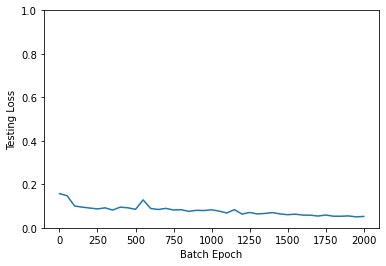

In [11]:
plt.ylim(0, 1.0)
plt.plot(index_test_list,test_losses)
plt.ylabel('Testing Loss')
plt.xlabel('Batch Epoch')
plt.show()





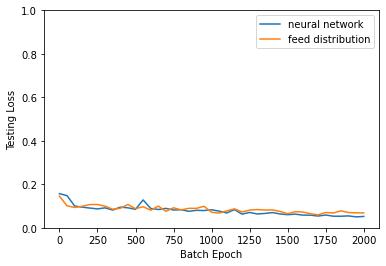

In [12]:
import csv
with open('save/test_loss_unfeed_uniform_5.csv', 'w', newline='') as csvfile_unfeed:
    spamwriter = csv.writer(csvfile_unfeed)
    spamwriter.writerow(index_test_list)
    spamwriter.writerow(test_losses)

with open('save/test_loss_feed_uniform_5.csv') as csvfile_feed:
    reader = csv.reader(csvfile_feed)
    list_feed = []
    for row in reader:
        row = np.array(row)
        temp_list = []
        for i in range(len(row)):
            temp_list.append(float(row[i]))

        list_feed.append(temp_list)
    plt.ylim(0, 1.0)
    plt.plot(index_test_list,test_losses,label='neural network')
    plt.plot(list_feed[0],list_feed[1],label='feed distribution')
    plt.ylabel('Testing Loss')
    plt.xlabel('Batch Epoch')
    #plt.title('Two or more lines on same plot with suitable legends ')
    # show a legend on the plot
    plt.legend()
    plt.show()

In [13]:
print(len(list_feed[0]))
print(len(list_feed[1]))

41
41


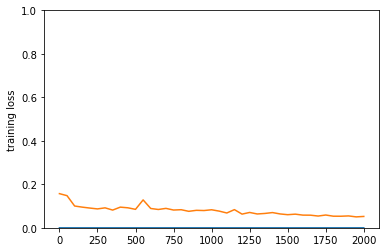

In [14]:
plt.ylim(0, 1.0)

plt.plot(index_train_list,train_losses)
plt.ylabel('training loss')

plt.plot(index_test_list,test_losses)
plt.ylabel('training loss')

plt.show()

In [15]:
torch.save(net, "save/Deep_learning_uniform_5_1")

In [16]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).to(dev).type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list),sum(result_list)/len(result_list)-min(result_list))

4.58156818151474 3.9985525438149847 0.5830156376997553 0.05079026741298032


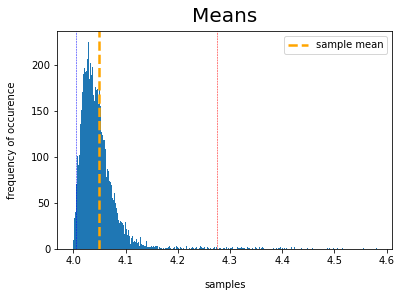

In [17]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()